In [1]:
import numpy as np
import struct
import copy
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
def write_file(path, contents):
    # path is a filename ending in .dat
    # contents is an array
    f = open(path, "wb")
    if not contents.flags['C_CONTIGUOUS']:
        contents = np.ascontiguousarray(contents)
    f.write(contents)
    f.close()

In [3]:
def read_file(path, l):
    f = open(path, 'rb')
    raw = f.read(l * 8)
    return np.array(struct.unpack('d'*l, raw))

In [4]:
def error_comparison(apprx_file, fractal_file, steps, show_fractals = False, compare_values = False):
    
    # compares two binary files containing information for lyapunov fractals
    
    # steps: how many steps were are their along the axis of the fractal, determines us the amount of bytes that will need to be read
    # show_fractals: if true will display the orginally fractals alongside the error map
    # compare_values: if true will show the absolute difference between the values of the fractals, false will display values of the same sign as having zero difference
    

    size = steps * steps
    
    apprx = read_file(apprx_file, size)
    fractal = read_file(fractal_file, size)
    
    diff = np.abs(np.subtract(fractal, apprx))
    
    if compare_values:
        error = diff
    else:
        error = [(not ((apprx[i] < 0) == (fractal[i] < 0))) * diff[i] for i in range(len(diff))]                      
    
    apprx = np.reshape(apprx, (steps,steps))
    fractal = np.reshape(fractal, (steps,steps))
    error = np.reshape(error, (steps,steps))
    
    if show_fractals:
        
        lya_cmap = copy.copy(mpl.cm.get_cmap('jet'))
        lya_cmap.set_over('black')
        
        fig, ax = plt.subplots(ncols=2)
        ax[0].imshow(apprx, vmax=0, vmin=-2.5, cmap= lya_cmap, origin = 'lower')
        im = ax[1].imshow(fractal, vmax=0, vmin=-2.5, cmap= lya_cmap, origin = 'lower')

        fig.subplots_adjust(right=0.8)
        cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
        fig.colorbar(im, cax=cbar_ax)

        plt.suptitle("Error of Linear Apprx versus True Logistic Fractal")

        plt.show()
    
    plt.figure(figsize = (11,8.5))
    
#     apprx = [(i < 0) * i for i in apprx]
#     fractal = [(i < 0) * i for i in fractal]

    plt.figure
    
#     error = np.abs(np.subtract(apprx, fractal))
    
    error_cmap = copy.copy(mpl.cm.get_cmap('viridis'))
    error_cmap.set_under('black')
    
    plt.imshow(error, cmap= error_cmap, origin = 'lower', vmin=0.00001)
    plt.colorbar()
    plt.show()

<ipython-input-4-b8c4cac6b8a4>:15: RuntimeWarning: invalid value encountered in subtract
  diff = np.abs(np.subtract(fractal, apprx))


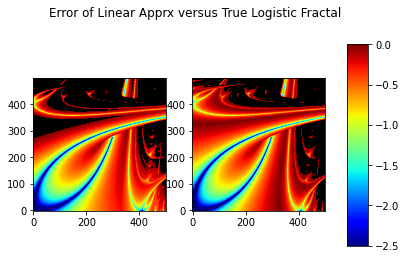

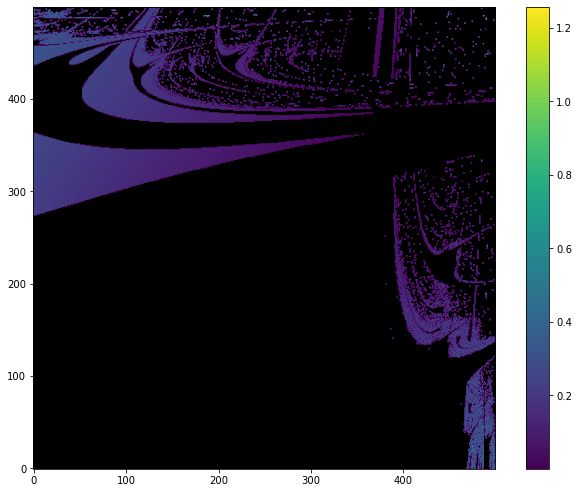

In [10]:
error_comparison("fractal_apprx n_points= 101 steps=500.dat", "lyapunov_fractal.dat", 500, True, False)

<ipython-input-4-b8c4cac6b8a4>:20: RuntimeWarning: invalid value encountered in multiply
  error = [(not ((apprx[i] < 0) == (fractal[i] < 0))) * diff[i] for i in range(len(diff))]


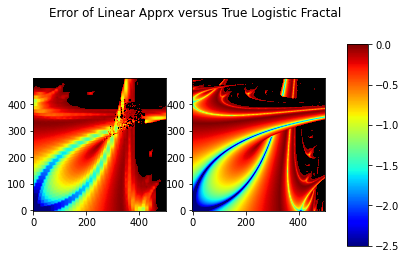

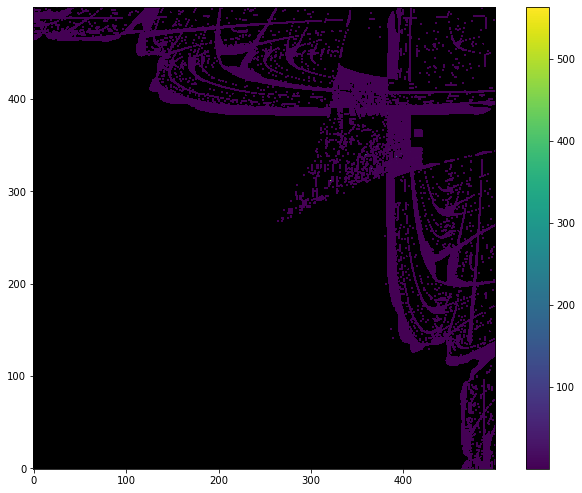

In [9]:
error_comparison("invariat_fractal_apprx n_points= 75 steps=500.dat", "lyapunov_fractal.dat", 500, True, False)